In [116]:
import numpy as np
# scipy.special for the sigmoid function expit()
import scipy.special as special
import matplotlib.pyplot as plt
# used the link for plotting
# https://matplotlib.org/examples/showcase/bachelors_degrees_by_gender.html

In [117]:
# neural network class definition
class neuralNetwork:
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
        #print("Output errors:", output_errors)
        return hidden_errors, output_errors
    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [118]:
# number of input, hidden and output nodes
input_nodes = 4
hidden_nodes = 4
output_nodes = 3

# learning rate is 0.3
learning_rate = 0.3

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [119]:
data = [[0.645569620253164, 0.795454545454545, 0.202898550724638, 0.08, 0.333333333333333],
[0.620253164556962, 0.681818181818182, 0.202898550724638, 0.08, 0.333333333333333],
[0.594936708860759, 0.727272727272727, 0.188405797101449, 0.08, 0.333333333333333],
[0.582278481012658, 0.704545454545454, 0.217391304347826, 0.08, 0.333333333333333],
[0.632911392405063, 0.818181818181818, 0.202898550724638, 0.08, 0.333333333333333],
[0.683544303797468, 0.886363636363636, 0.246376811594203, 0.16, 0.333333333333333],
[0.582278481012658, 0.772727272727273, 0.202898550724638, 0.12, 0.333333333333333],
[0.632911392405063, 0.772727272727273, 0.217391304347826, 0.08, 0.333333333333333],
[0.556962025316456, 0.659090909090909, 0.202898550724638, 0.08, 0.333333333333333],
[0.620253164556962, 0.704545454545454, 0.217391304347826, 0.04, 0.333333333333333],
[0.683544303797468, 0.840909090909091, 0.217391304347826, 0.08, 0.333333333333333],
[0.607594936708861, 0.772727272727273, 0.231884057971014, 0.08, 0.333333333333333],
[0.607594936708861, 0.681818181818182, 0.202898550724638, 0.04, 0.333333333333333],
[0.544303797468354, 0.681818181818182, 0.159420289855072, 0.04, 0.333333333333333],
[0.734177215189873, 0.909090909090909, 0.173913043478261, 0.08, 0.333333333333333],
[0.721518987341772, 1, 0.217391304347826, 0.16, 0.333333333333333],
[0.683544303797468, 0.886363636363636, 0.188405797101449, 0.16, 0.333333333333333],
[0.645569620253164, 0.795454545454545, 0.202898550724638, 0.12, 0.333333333333333],
[0.721518987341772, 0.863636363636364, 0.246376811594203, 0.12, 0.333333333333333],
[0.645569620253164, 0.863636363636364, 0.217391304347826, 0.12, 0.333333333333333],
[0.683544303797468, 0.772727272727273, 0.246376811594203, 0.08, 0.333333333333333],
[0.645569620253164, 0.840909090909091, 0.217391304347826, 0.16, 0.333333333333333],
[0.582278481012658, 0.818181818181818, 0.144927536231884, 0.08, 0.333333333333333],
[0.645569620253164, 0.75, 0.246376811594203, 0.2, 0.333333333333333],
[0.607594936708861, 0.772727272727273, 0.27536231884058, 0.08, 0.333333333333333],
[0.632911392405063, 0.681818181818182, 0.231884057971014, 0.08, 0.333333333333333],
[0.632911392405063, 0.772727272727273, 0.231884057971014, 0.16, 0.333333333333333],
[0.658227848101266, 0.795454545454545, 0.217391304347826, 0.08, 0.333333333333333],
[0.658227848101266, 0.772727272727273, 0.202898550724638, 0.08, 0.333333333333333],
[0.594936708860759, 0.727272727272727, 0.231884057971014, 0.08, 0.333333333333333],
[0.607594936708861, 0.704545454545454, 0.231884057971014, 0.08, 0.333333333333333],
[0.683544303797468, 0.772727272727273, 0.217391304347826, 0.16, 0.333333333333333],
[0.658227848101266, 0.931818181818182, 0.217391304347826, 0.04, 0.333333333333333],
[0.69620253164557, 0.954545454545454, 0.202898550724638, 0.08, 0.333333333333333],
[0.620253164556962, 0.704545454545454, 0.217391304347826, 0.04, 0.333333333333333],
[0.632911392405063, 0.727272727272727, 0.173913043478261, 0.08, 0.333333333333333],
[0.69620253164557, 0.795454545454545, 0.188405797101449, 0.08, 0.333333333333333],
[0.620253164556962, 0.704545454545454, 0.217391304347826, 0.04, 0.333333333333333],
[0.556962025316456, 0.681818181818182, 0.188405797101449, 0.08, 0.333333333333333],
[0.645569620253164, 0.772727272727273, 0.217391304347826, 0.08, 0.333333333333333],
[0.632911392405063, 0.795454545454545, 0.188405797101449, 0.12, 0.333333333333333],
[0.569620253164557, 0.522727272727273, 0.188405797101449, 0.12, 0.333333333333333],
[0.556962025316456, 0.727272727272727, 0.188405797101449, 0.08, 0.333333333333333],
[0.632911392405063, 0.795454545454545, 0.231884057971014, 0.24, 0.333333333333333],
[0.645569620253164, 0.863636363636364, 0.27536231884058, 0.16, 0.333333333333333],
[0.607594936708861, 0.681818181818182, 0.202898550724638, 0.12, 0.333333333333333],
[0.645569620253164, 0.863636363636364, 0.231884057971014, 0.08, 0.333333333333333],
[0.582278481012658, 0.727272727272727, 0.202898550724638, 0.08, 0.333333333333333],
[0.670886075949367, 0.840909090909091, 0.217391304347826, 0.08, 0.333333333333333],
[0.632911392405063, 0.75, 0.202898550724638, 0.08, 0.333333333333333],
[0.886075949367089, 0.727272727272727, 0.681159420289855, 0.56, 0.666666666666667],
[0.810126582278481, 0.727272727272727, 0.652173913043478, 0.6, 0.666666666666667],
[0.873417721518987, 0.704545454545454, 0.710144927536232, 0.6, 0.666666666666667],
[0.69620253164557, 0.522727272727273, 0.579710144927536, 0.52, 0.666666666666667],
[0.822784810126582, 0.636363636363636, 0.666666666666667, 0.6, 0.666666666666667],
[0.721518987341772, 0.636363636363636, 0.652173913043478, 0.52, 0.666666666666667],
[0.79746835443038, 0.75, 0.681159420289855, 0.64, 0.666666666666667],
[0.620253164556962, 0.545454545454545, 0.478260869565217, 0.4, 0.666666666666667],
[0.835443037974683, 0.659090909090909, 0.666666666666667, 0.52, 0.666666666666667],
[0.658227848101266, 0.613636363636364, 0.565217391304348, 0.56, 0.666666666666667],
[0.632911392405063, 0.454545454545455, 0.507246376811594, 0.4, 0.666666666666667],
[0.746835443037975, 0.681818181818182, 0.608695652173913, 0.6, 0.666666666666667],
[0.759493670886076, 0.5, 0.579710144927536, 0.4, 0.666666666666667],
[0.772151898734177, 0.659090909090909, 0.681159420289855, 0.56, 0.666666666666667],
[0.708860759493671, 0.659090909090909, 0.521739130434783, 0.52, 0.666666666666667],
[0.848101265822785, 0.704545454545454, 0.63768115942029, 0.56, 0.666666666666667],
[0.708860759493671, 0.681818181818182, 0.652173913043478, 0.6, 0.666666666666667],
[0.734177215189873, 0.613636363636364, 0.594202898550725, 0.4, 0.666666666666667],
[0.784810126582278, 0.5, 0.652173913043478, 0.6, 0.666666666666667],
[0.708860759493671, 0.568181818181818, 0.565217391304348, 0.44, 0.666666666666667],
[0.746835443037975, 0.727272727272727, 0.695652173913043, 0.72, 0.666666666666667],
[0.772151898734177, 0.636363636363636, 0.579710144927536, 0.52, 0.666666666666667],
[0.79746835443038, 0.568181818181818, 0.710144927536232, 0.6, 0.666666666666667],
[0.772151898734177, 0.636363636363636, 0.681159420289855, 0.48, 0.666666666666667],
[0.810126582278481, 0.659090909090909, 0.623188405797101, 0.52, 0.666666666666667],
[0.835443037974683, 0.681818181818182, 0.63768115942029, 0.56, 0.666666666666667],
[0.860759493670886, 0.636363636363636, 0.695652173913043, 0.56, 0.666666666666667],
[0.848101265822785, 0.681818181818182, 0.72463768115942, 0.68, 0.666666666666667],
[0.759493670886076, 0.659090909090909, 0.652173913043478, 0.6, 0.666666666666667],
[0.721518987341772, 0.590909090909091, 0.507246376811594, 0.4, 0.666666666666667],
[0.69620253164557, 0.545454545454545, 0.550724637681159, 0.44, 0.666666666666667],
[0.69620253164557, 0.545454545454545, 0.536231884057971, 0.4, 0.666666666666667],
[0.734177215189873, 0.613636363636364, 0.565217391304348, 0.48, 0.666666666666667],
[0.759493670886076, 0.613636363636364, 0.739130434782609, 0.64, 0.666666666666667],
[0.683544303797468, 0.681818181818182, 0.652173913043478, 0.6, 0.666666666666667],
[0.759493670886076, 0.772727272727273, 0.652173913043478, 0.64, 0.666666666666667],
[0.848101265822785, 0.704545454545454, 0.681159420289855, 0.6, 0.666666666666667],
[0.79746835443038, 0.522727272727273, 0.63768115942029, 0.52, 0.666666666666667],
[0.708860759493671, 0.681818181818182, 0.594202898550725, 0.52, 0.666666666666667],
[0.69620253164557, 0.568181818181818, 0.579710144927536, 0.52, 0.666666666666667],
[0.69620253164557, 0.590909090909091, 0.63768115942029, 0.48, 0.666666666666667],
[0.772151898734177, 0.681818181818182, 0.666666666666667, 0.56, 0.666666666666667],
[0.734177215189873, 0.590909090909091, 0.579710144927536, 0.48, 0.666666666666667],
[0.632911392405063, 0.522727272727273, 0.478260869565217, 0.4, 0.666666666666667],
[0.708860759493671, 0.613636363636364, 0.608695652173913, 0.52, 0.666666666666667],
[0.721518987341772, 0.681818181818182, 0.608695652173913, 0.48, 0.666666666666667],
[0.721518987341772, 0.659090909090909, 0.608695652173913, 0.52, 0.666666666666667],
[0.784810126582278, 0.659090909090909, 0.623188405797101, 0.52, 0.666666666666667],
[0.645569620253164, 0.568181818181818, 0.434782608695652, 0.44, 0.666666666666667],
[0.721518987341772, 0.636363636363636, 0.594202898550725, 0.52, 0.666666666666667],
[0.79746835443038, 0.75, 0.869565217391304, 1, 1],
[0.734177215189873, 0.613636363636364, 0.739130434782609, 0.76, 1],
[0.89873417721519, 0.681818181818182, 0.855072463768116, 0.84, 1],
[0.79746835443038, 0.659090909090909, 0.811594202898551, 0.72, 1],
[0.822784810126582, 0.681818181818182, 0.840579710144927, 0.88, 1],
[0.962025316455696, 0.681818181818182, 0.956521739130435, 0.84, 1],
[0.620253164556962, 0.568181818181818, 0.652173913043478, 0.68, 1],
[0.924050632911392, 0.659090909090909, 0.91304347826087, 0.72, 1],
[0.848101265822785, 0.568181818181818, 0.840579710144927, 0.72, 1],
[0.911392405063291, 0.818181818181818, 0.884057971014493, 1, 1],
[0.822784810126582, 0.727272727272727, 0.739130434782609, 0.8, 1],
[0.810126582278481, 0.613636363636364, 0.768115942028985, 0.76, 1],
[0.860759493670886, 0.681818181818182, 0.797101449275362, 0.84, 1],
[0.721518987341772, 0.568181818181818, 0.72463768115942, 0.8, 1],
[0.734177215189873, 0.636363636363636, 0.739130434782609, 0.96, 1],
[0.810126582278481, 0.727272727272727, 0.768115942028985, 0.92, 1],
[0.822784810126582, 0.681818181818182, 0.797101449275362, 0.72, 1],
[0.974683544303797, 0.863636363636364, 0.971014492753623, 0.88, 1],
[0.974683544303797, 0.590909090909091, 1, 0.92, 1],
[0.759493670886076, 0.5, 0.72463768115942, 0.6, 1],
[0.873417721518987, 0.727272727272727, 0.826086956521739, 0.92, 1],
[0.708860759493671, 0.636363636363636, 0.710144927536232, 0.8, 1],
[0.974683544303797, 0.636363636363636, 0.971014492753623, 0.8, 1],
[0.79746835443038, 0.613636363636364, 0.710144927536232, 0.72, 1],
[0.848101265822785, 0.75, 0.826086956521739, 0.84, 1],
[0.911392405063291, 0.727272727272727, 0.869565217391304, 0.72, 1],
[0.784810126582278, 0.636363636363636, 0.695652173913043, 0.72, 1],
[0.772151898734177, 0.681818181818182, 0.710144927536232, 0.72, 1],
[0.810126582278481, 0.636363636363636, 0.811594202898551, 0.84, 1],
[0.911392405063291, 0.681818181818182, 0.840579710144927, 0.64, 1],
[0.936708860759494, 0.636363636363636, 0.884057971014493, 0.76, 1],
[1, 0.863636363636364, 0.927536231884058, 0.8, 1],
[0.810126582278481, 0.636363636363636, 0.811594202898551, 0.88, 1],
[0.79746835443038, 0.636363636363636, 0.739130434782609, 0.6, 1],
[0.772151898734177, 0.590909090909091, 0.811594202898551, 0.56, 1],
[0.974683544303797, 0.681818181818182, 0.884057971014493, 0.92, 1],
[0.79746835443038, 0.772727272727273, 0.811594202898551, 0.96, 1],
[0.810126582278481, 0.704545454545454, 0.797101449275362, 0.72, 1],
[0.759493670886076, 0.681818181818182, 0.695652173913043, 0.72, 1],
[0.873417721518987, 0.704545454545454, 0.782608695652174, 0.84, 1],
[0.848101265822785, 0.704545454545454, 0.811594202898551, 0.96, 1],
[0.873417721518987, 0.704545454545454, 0.739130434782609, 0.92, 1],
[0.734177215189873, 0.613636363636364, 0.739130434782609, 0.76, 1],
[0.860759493670886, 0.727272727272727, 0.855072463768116, 0.92, 1],
[0.848101265822785, 0.75, 0.826086956521739, 1, 1],
[0.848101265822785, 0.681818181818182, 0.753623188405797, 0.92, 1],
[0.79746835443038, 0.568181818181818, 0.72463768115942, 0.76, 1],
[0.822784810126582, 0.681818181818182, 0.753623188405797, 0.8, 1],
[0.784810126582278, 0.772727272727273, 0.782608695652174, 0.92, 1],
[0.746835443037975, 0.681818181818182, 0.739130434782609, 0.72, 1]]

In [137]:
# weight_changes should have 12 arrays 150 numbers
weight_changes = []

for i in range (0, hidden_nodes*output_nodes):
    weights = []
    weight_changes.append(weights)
    pass

output_errors = []
for i in range(0, output_nodes):
    errors = []
    output_errors.append(errors)

iterations = []
iter_count = 1
for i in data:
    # train the NN with each instance of data
    h_errors, o_errors = n.train(i[0:4], i[4:5])
    
    count = 0
    for weight_row in n.who:
        for element in weight_row:
            weight_changes[count].append(element)
            count += 1
    
    count = 0
    for error in o_errors:
        output_errors[count].append(error[0])
        count += 1
    
    iterations.append(iter_count)
    iter_count += 1
    pass

In [138]:
def PlotWeights(weight_trail):
    # These are the colors that will be used in the plot
    color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
                  '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                  '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                  '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']
    # Common sizes: (10, 7.5) and (12, 9)
    fig, ax = plt.subplots(1, 1, figsize=(15, 8))
    
    # Remove the plot frame lines. They are unnecessary here.
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # Ensure that the axis ticks only show up on the bottom and left of the plot.
    # Ticks on the right and top of the plot are generally unnecessary.
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
    fig.subplots_adjust(left=.06, right=.90, bottom=.02, top=.94)
    # Limit the range of the plot to only where the data is.
    # Avoid unnecessary whitespace.
    ax.set_xlim(0.0, 150.1)
    ax.set_ylim(-3.0, 3.0)
    
    # Make sure your axis ticks are large enough to be easily read.
    # You don't want your viewers squinting to read your plot.
    plt.xticks(range(0, 150, 10), fontsize=14)
    plt.yticks(range(-2, 2), fontsize=14)
    ax.xaxis.set_major_formatter(plt.FuncFormatter('{:.0f}'.format))
    ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}'.format))
    
    # Provide tick lines across the plot to help your viewers trace along
    # the axis ticks. Make sure that the lines are light and small so they
    # don't obscure the primary data lines.
    plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
    
    # Remove the tick marks; they are unnecessary with the tick lines we just
    # plotted.
    plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='on', left='off', right='off', labelleft='on')
    
    # Now that the plot is prepared, it's time to actually plot the data!
    # Note that I plotted the majors in order of the highest % in the final year.
    hm_weights = ['w11', 'w12', 'w13', 'w14',
                  'w21', 'w22', 'w23', 'w24',
                  'w31', 'w32', 'w33', 'w34']
    
    hm_errors = ['error1', 'error2', 'error3']
    
    y_offsets = {'Foreign Languages': 0.5, 'English': -0.5,
             'Communications\nand Journalism': 0.75,
             'Art and Performance': -0.25, 'Agriculture': 1.25,
             'Social Sciences and History': 0.25, 'Business': -0.75,
             'Math and Statistics': 0.75, 'Architecture': -0.75,
             'Computer Science': 0.75, 'Engineering': -0.25}
    
    for rank, col in enumerate(hm_weights):
        line = plt.plot(iterations,
                        weight_changes[rank],
                        lw=2.5,
                        color=color_sequence[rank])
    
    for rank, col in enumerate(hm_errors):
        line = plt.plot(iterations,
                        output_errors[rank],
                        lw=2.5,
                        color=color_sequence[rank])
    
    fig.suptitle('Changes in weights as neural network gets trained by each instance', fontsize=18, ha='center')
    
    plt.show()

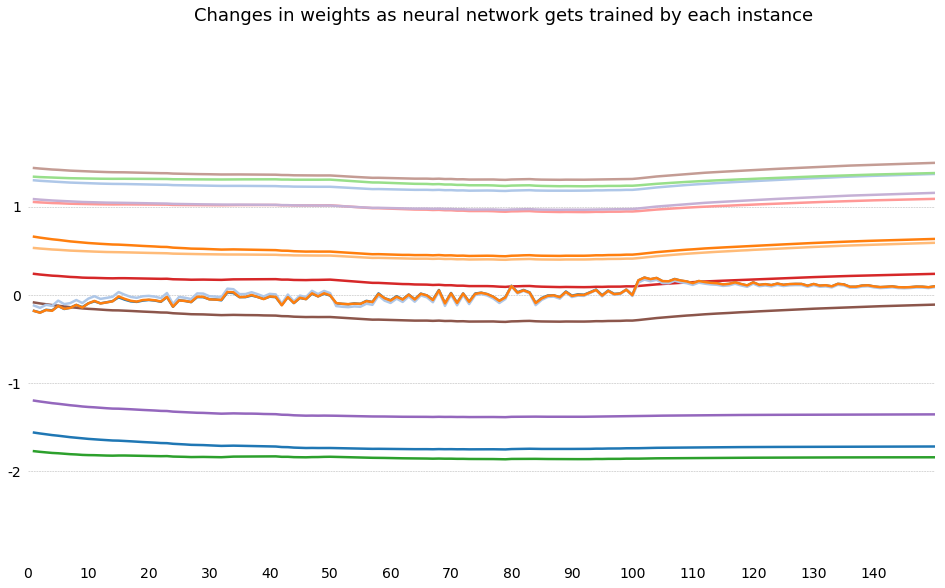

In [139]:
PlotWeights(weight_changes)